# Ingest and View Data

In [1]:
import pandas as pd
from sqlalchemy import create_engine

Creating connection to AWS Postgres database.

In [2]:
POSTGRES_USERNAME = 'root'
POSTGRES_PASSWORD = 'koBREipm4h7CuRKix2Tn'
POSTGRES_HOSTNAME = 'database-1.c3ma8u2guxxs.us-east-2.rds.amazonaws.com'
POSTGRES_PORT = '5432'
POSTGRES_DBNAME = 'postgres'

connection_string = f"postgresql://{POSTGRES_USERNAME}:{POSTGRES_PASSWORD}@{POSTGRES_HOSTNAME}:{POSTGRES_PORT}/{POSTGRES_DBNAME}"
engine = create_engine(connection_string)

In [3]:
query = """
SELECT * FROM darwin
"""

df = pd.read_sql(query, engine)

In [4]:
df.head()

,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,...,platform,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,source_instance,estimated_time_minutes
0,202407037139232,G39232,2024-07-03,TD,SCROYDN,None,19:31:00,19:31:30,19:31:00,19:31:00,...,4,10.0,None,None,None,None,False,False,None,None
1,202407036785172,C85172,2024-07-03,CIS,LIVSTLL,None,19:37:00,19:38:00,19:37:00,19:38:00,...,A,NaN,None,None,None,None,False,False,None,None
2,202407036735756,C35756,2024-07-03,TD,ESTHRAK,None,19:30:30,19:31:00,19:31:00,19:31:00,...,2,NaN,None,None,None,None,False,False,None,None
3,202407036735756,C35756,2024-07-03,TD,BRMB,None,19:33:00,19:33:30,19:33:00,19:33:00,...,1,NaN,None,None,None,None,False,False,None,None
4,202407036735756,C35756,2024-07-03,TD,BRMBRK,None,19:35:00,19:35:30,19:35:00,19:35:00,...,2,NaN,None,None,None,None,False,False,None,None


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577254 entries, 0 to 577253
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   route_id                577254 non-null  object 
 1   unique_id               577254 non-null  object 
 2   service_start_date      577254 non-null  object 
 3   update_origin           562862 non-null  object 
 4   train_platform          577254 non-null  object 
 5   working_time_pass       0 non-null       object 
 6   working_time_arrival    577254 non-null  object 
 7   working_time_departure  577254 non-null  object 
 8   planned_time_arrival    527172 non-null  object 
 9   planned_time_departure  524956 non-null  object 
 10  actual_arrival_time     484225 non-null  object 
 11  actual_departure_time   539176 non-null  object 
 12  platform                540289 non-null  object 
 13  train_length            192206 non-null  float64
 14  estimated_time      

# Clean DF 
**Drop Null Columns and Unnecessary Columns**

In [6]:
df_cleaned = df

In [7]:
# check duplicates
duplicates = df_cleaned.duplicated().sum()
print(f'There are {duplicates} duplicates in this dataset.')

There are 17987 duplicates in this dataset.


In [8]:
# to drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

In [9]:
# columns to drop due to null values or used in analysis
columns_to_drop = [
    'working_time_pass',
    'estimated_time',
    'source',
    'actual_time',
    'actual_time_class',
    'source_instance',
    'estimated_time_minutes',
    'train_length', 
    'update_origin',
    'planned_time_arrival',
    'planned_time_departure',
    'platform'
]

df_cleaned = df_cleaned.drop(columns=columns_to_drop)

In [10]:
# check nulls
df_cleaned.isna().sum()

route_id                      0
unique_id                     0
service_start_date            0
train_platform                0
working_time_arrival          0
working_time_departure        0
actual_arrival_time       92711
actual_departure_time     37489
is_delayed_arrival            0
is_delayed_departure          0
dtype: int64

In [11]:
percent_dropped = round( ((1- (df_cleaned.dropna().shape[0]/df_cleaned.shape[0]))*100), 2)
print(f'Dropping the nulls reduces the rows of the dataset by {percent_dropped}%.')

Dropping the nulls reduces the rows of the dataset by 17.1%.


In [12]:
# to drop remaining nulls
# df_cleaned = df_cleaned.dropna()

# Create Delay DF

Creating another query to pull a dataframe where all of the trains are delayed.

In [13]:
query_delay = "SELECT * FROM darwin WHERE is_delayed_arrival = True AND is_delayed_departure = True"
df_delay = pd.read_sql(query_delay, engine)

In [14]:
duplicates = df_delay.duplicated().sum()
print(f'There are {duplicates} duplicates in this dataset.')

There are 338 duplicates in this dataset.


In [15]:
df_delay = df_delay.drop_duplicates()

Dropping the same columns as we did in the previous dataframe.

In [16]:
df_delay = df_delay.drop(columns=columns_to_drop)

Looking to drop the nulls next.

In [17]:
percent_dropped = round( ((1- (df_delay.dropna().shape[0]/df_delay.shape[0]))*100), 2)
print(f'Dropping the nulls reduces the rows of the dataset by {percent_dropped}%.')

Dropping the nulls reduces the rows of the dataset by 0.41%.


In [18]:
df_delay = df_delay.dropna()

In [19]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72389 entries, 0 to 73023
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   route_id                72389 non-null  object
 1   unique_id               72389 non-null  object
 2   service_start_date      72389 non-null  object
 3   train_platform          72389 non-null  object
 4   working_time_arrival    72389 non-null  object
 5   working_time_departure  72389 non-null  object
 6   actual_arrival_time     72389 non-null  object
 7   actual_departure_time   72389 non-null  object
 8   is_delayed_arrival      72389 non-null  bool  
 9   is_delayed_departure    72389 non-null  bool  
dtypes: bool(2), object(8)
memory usage: 5.1+ MB


In [20]:
df_delay.describe()

,route_id,unique_id,service_start_date,train_platform,working_time_arrival,working_time_departure,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure
count,72389,72389,72389,72389,72389,72389,72389,72389,72389,72389
unique,7869,5521,15,2609,2687,2693,1440,1440,1,1
top,202407158332472,S32472,2024-07-14,WLSDNJL,00:07:00,00:15:00,21:01:00,21:01:00,True,True
freq,273,273,11713,2299,186,160,167,164,72389,72389


# Adding Duration Column to both Dataframes
Convert times from object datatypes to time datatypes.

In [21]:
df_cleaned['working_time_arrival'] = pd.to_datetime(df_cleaned['working_time_arrival'], format='%H:%M:%S')
df_cleaned['working_time_departure'] = pd.to_datetime(df_cleaned['working_time_departure'], format='%H:%M:%S')

Complete math to find duration.

In [22]:
df_cleaned['duration (min)'] = ((df_cleaned['working_time_departure']-df_cleaned['working_time_arrival'])\
                                .dt.total_seconds()/60)

Transition back to time only.

In [23]:
df_cleaned['working_time_arrival'] = df_cleaned['working_time_arrival'].dt.time
df_cleaned['working_time_departure'] = df_cleaned['working_time_departure'].dt.time

Repeat for Delay Dataframe.

In [24]:
df_delay['working_time_arrival'] = pd.to_datetime(df_delay['working_time_arrival'], format='%H:%M:%S')
df_delay['working_time_departure'] = pd.to_datetime(df_delay['working_time_departure'], format='%H:%M:%S')
df_delay['duration (min)'] = ((df_delay['working_time_departure']-df_delay['working_time_arrival'])\
                                .dt.total_seconds()/60)
df_delay['working_time_arrival'] = df_delay['working_time_arrival'].dt.time
df_delay['working_time_departure'] = df_delay['working_time_departure'].dt.time

This math will create erroneous values where the train departed before midnight and arrived after. There are also some cases where the trip duration was zero. The next steps will identify and exclude these values from further analysis.

In [25]:
# Check for zero and negative values
neg_zero_duration_counts = df_cleaned[df_cleaned['duration (min)'] <= 0]['duration (min)'].value_counts().sort_index(ascending=True)

# Display the result
print(neg_zero_duration_counts)

duration (min)
-1438.5      18
-1438.0      27
-1437.5       9
-1437.0      50
-1436.5       1
-1436.0      72
-1435.0      34
-1434.5       2
-1434.0      51
-1433.5       1
-1433.0      28
-1432.0      39
-1431.5       7
-1431.0      26
-1430.5       1
-1430.0      75
-1429.5       3
-1429.0       1
-1428.0       3
-1427.0       8
-1426.0       4
-1423.0       8
-1421.5       2
-1421.0       1
-1420.0       4
-1419.0      12
-1418.0       7
-1417.5       4
-1416.0       1
-1413.0       6
-1407.0       6
-1406.5       6
-1406.0       1
-1402.0       1
-1401.0      27
-1395.0       8
-1392.0       4
-1352.0       4
-1351.0       1
-1320.0       1
-1313.5      18
-1310.5       1
-1309.0       1
-1303.0       2
-1272.5       2
 0.0       8856
Name: count, dtype: int64


In [26]:
# Drop the rows with negative values in duration
df_cleaned = df_cleaned[df_cleaned['duration (min)'] > 0]

In [27]:
# Check
neg_zero_duration_counts = df_cleaned[df_cleaned['duration (min)'] <= 0]['duration (min)'].value_counts().sort_index(ascending=True)

# Display the result
print(neg_zero_duration_counts.sum())

0


In [28]:
# Repeating Drop for delay_df to remove negative values in duration

df_delay = df_delay[df_delay['duration (min)'] > 0]

## Adding a Day of the Week Column

In [29]:
df_cleaned['service_start_date'] = pd.to_datetime(df_cleaned['service_start_date'])
df_cleaned['weekday'] = df_cleaned['service_start_date'].dt.day_name()

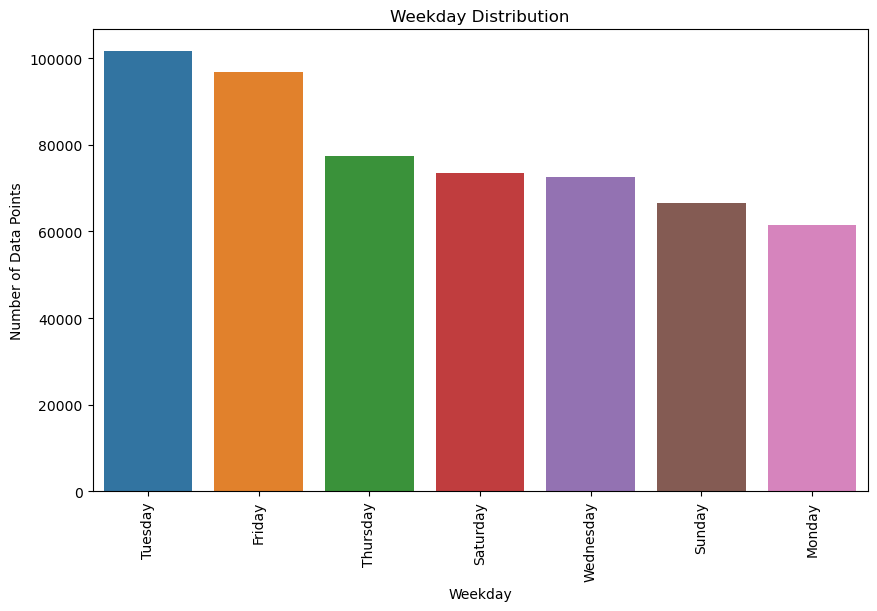

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Top 10 most frequently visited stations
weekday_dist = df_cleaned['weekday'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=weekday_dist.index, y=weekday_dist.values)
plt.title('Weekday Distribution')
plt.xlabel('Weekday')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=90)
plt.show()

Keeping an eye on this distribtuion to try and keep data collection even across each weekday. Next, add the weekday column to the Delay dataframe as well.

In [31]:
df_delay['service_start_date'] = pd.to_datetime(df_delay['service_start_date'])
df_delay['weekday'] = df_delay['service_start_date'].dt.day_name()

# Ingest Rail References Data
The "RailReferences.csv" was provided by Grand Circus. Columns of interest are Station Name, TipLoc Code, and Easting and Northing coordinates. 

In [32]:
reference_df = pd.read_csv('./raw_data/RailReferences.csv')

## Convert Easting, Northing to Latitude and Longitude

In [33]:
!pip install pyproj

In [34]:
from pyproj import Transformer

In [35]:
#  Define the British National Grid projection (EPSG:27700) and WGS84
osgb_projection = 'epsg:27700'  # British National Grid
wgs84_projection = 'epsg:4326'  # WGS84
# Initialize the transformer
transformer = Transformer.from_crs(osgb_projection, wgs84_projection)

In [36]:
# Function to convert British National Grid to latitude and longitude
def convert_osgb_to_latlong(easting, northing):
    longitude, latitude = transformer.transform(easting, northing)
    return longitude, latitude

In [37]:
# Apply conversion to the DataFrame and create new columns Latitude and Longitude
reference_df[['Latitude', 'Longitude']] = reference_df.apply(lambda row: convert_osgb_to_latlong(row['Easting'], row['Northing']),\
                                         axis=1,\
                                         result_type='expand')

In [38]:
# Data needed for analysis 
data = reference_df[['TiplocCode', 'StationName', 'Latitude', 'Longitude']]
data

,TiplocCode,StationName,Latitude,Longitude
0,PENZNCE,Penzance Rail Station,50.121672,-5.532565
1,STIVES,St Ives (Cornwall) Rail Station,50.209043,-5.477912
2,CARBISB,Carbis Bay Rail Station,50.197048,-5.463263
3,STERTH,St Erth Rail Station,50.170489,-5.444252
4,LELANTS,Lelant Saltings Rail Station,50.178775,-5.440926
...,...,...,...,...
2623,SMRLYTN,Somerleyton Rail Station,52.510229,1.652260
2624,OULTNBS,Oulton Broad South Rail Station,52.469602,1.707659
2625,YARMTH,Great Yarmouth Rail Station,52.612158,1.720886
2626,OULTNBN,Oulton Broad North Rail Station,52.477759,1.715711


### Data Enrichment
Used this section to add identifying information for top Timing Point Locations (*TiplocCode*) not already identified in the supplied "RailReferences.csv" data. 

Research indicates that the Timing Point Location for BONDST, correlates to Bond Street Station$^{1}$ located at 51.514°N, 0.15°W$^{2}$. 

In [39]:
new_row = pd.DataFrame([['BONDST', 'Bond Street Station', 51.514, -0.15]], columns=data.columns)
data = pd.concat([data, new_row], ignore_index=True)

Research indicates that the Timing Point Location for TOTCTRD, correlates to Tottenham Court Road$^{1}$ located at 51.5207°N, 0.1345°W$^{3}$. 

In [40]:
new_row = pd.DataFrame([['TOTCTRD', 'Tottenham Court Road', 51.5207, -0.1345]], columns=data.columns)
data = pd.concat([data, new_row], ignore_index=True)

Research indicates that the Timing Point Location for CANWHRF, correlates to Canary Wharf Railway Station$^{1}$ located at 51.5061°N, 0.01578°W$^{4}$. 

In [41]:
new_row = pd.DataFrame([['CANWHRF', 'Canary Wharf Railway Station', 51.5061, -0.01578]], columns=data.columns)
data = pd.concat([data, new_row], ignore_index=True)

Research indicates that the Timing Point Location for WCHAPXR, correlates to Whitechapel Crossrail$^{1}$ located at 51.5195°N, 0.0612°W$^{5, 6}$. 

In [42]:
new_row = pd.DataFrame([['WCHAPXR', 'Whitechapel Crossrail', 51.9195, -0.0612]], columns=data.columns)
data = pd.concat([data, new_row], ignore_index=True)

Research indicates that the Timing Point Location for LIVSTLL, correlates to London Liverpool Street Crossrail$^{1}$ located at 51.5186°N, 0.0813°W$^{6, 7}$. 

In [43]:
new_row = pd.DataFrame([['LIVSTLL', 'London Liverpool Street Crossrail', 51.5186, -0.0813]], columns=data.columns)
data = pd.concat([data, new_row], ignore_index=True)

### References

1. http://www.railwaycodes.org.uk/crs/crsb.shtm

2. https://en.wikipedia.org/wiki/Bond_Street_station

3. https://en.wikipedia.org/wiki/Tottenham_Court_Road

4. https://en.wikipedia.org/wiki/Canary_Wharf_railway_station

5. https://en.wikipedia.org/wiki/Whitechapel_station

6. https://en.wikipedia.org/wiki/Crossrail

7. https://en.wikipedia.org/wiki/Liverpool_Street_station

## Using Rail References to Replace Train Platform with Station Name

In [44]:
# Merge df_cleaned with data columns from reference_df

df_merged = df_cleaned.merge(data, left_on='train_platform', right_on='TiplocCode', how='left')

In [45]:
# checking where train_platform has no related StationName/Tiploccode
nan_rows = df_merged[df_merged[['TiplocCode', 'StationName']].isna().any(axis=1)]

nan_rows[['train_platform', 'TiplocCode', 'StationName']]

,train_platform,TiplocCode,StationName
16,WOLWXR,NaN,NaN
23,FRMPKRS,NaN,NaN
24,HRNS451,NaN,NaN
25,BOWERRL,NaN,NaN
52,CMRNBDG,NaN,NaN
...,...,...,...
549579,FRNDXR,NaN,NaN
549685,PADTLL,NaN,NaN
549773,FRNDXR,NaN,NaN
549775,PADTLL,NaN,NaN


We used the below list to indentify items we could research and try to add to the above Data Enrichment section.

In [46]:
# Identifying most highly frequented unknown Station Names
station_NaN = df_merged[df_merged['StationName'].isna()]['train_platform'].value_counts()
station_NaN.head(20)

train_platform
FRNDXR     1537
PADTLL      967
CUSTMHS     856
WOLWXR      814
STALBCS     679
BRENTX      618
MAGHNTH     514
MLLF        427
PALL        420
CIVI        413
UNIV        399
STDI        397
BOWERRL     373
FELL        356
SHLDNO1     330
CHST528     326
CNNBELL     325
PELAWTW     288
EBSFLTI     283
STFORDI     267
Name: count, dtype: int64

In [47]:
# fill NaN values in the StationName column with the corresponding train_platform values
df_merged['StationName'] = df_merged['StationName'].fillna(df_merged['train_platform'])

# Replace 'Rail Station' with an empty string to make more readable
df_merged['StationName'] = df_merged['StationName'].str.replace(' Rail Station', '')

In [48]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549823 entries, 0 to 549822
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   route_id                549823 non-null  object        
 1   unique_id               549823 non-null  object        
 2   service_start_date      549823 non-null  datetime64[ns]
 3   train_platform          549823 non-null  object        
 4   working_time_arrival    549823 non-null  object        
 5   working_time_departure  549823 non-null  object        
 6   actual_arrival_time     457983 non-null  object        
 7   actual_departure_time   512583 non-null  object        
 8   is_delayed_arrival      549823 non-null  bool          
 9   is_delayed_departure    549823 non-null  bool          
 10  duration (min)          549823 non-null  float64       
 11  weekday                 549823 non-null  object        
 12  TiplocCode              521306

# Delays Dataframe
Here we will merge on the information from the previous steps and create a new column "delay duration."

In [49]:
df_delay = df_delay.merge(data, left_on='train_platform', right_on='TiplocCode', how='left')

In [50]:
# fill NaN values in the StationName column with the corresponding train_platform values
df_delay['StationName'] = df_delay['StationName'].fillna(df_delay['train_platform'])

# Replace 'Rail Station' with an empty string to make more readable
df_delay['StationName'] = df_delay['StationName'].str.replace(' Rail Station', '')

In [51]:
df_delay.head()

,route_id,unique_id,service_start_date,train_platform,working_time_arrival,working_time_departure,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure,duration (min),weekday,TiplocCode,StationName,Latitude,Longitude
0,202407037144581,G44581,2024-07-03,GLOSTER,19:22:00,19:28:00,19:32:00,19:33:00,True,True,6.0,Wednesday,GLOSTER,Gloucester,51.865557,-2.238488
1,202407036707715,C07715,2024-07-03,LADYBHL,19:24:00,19:35:30,19:33:00,19:34:00,True,True,11.5,Wednesday,NaN,LADYBHL,NaN,NaN
2,202407037154103,G54103,2024-07-03,CRAWLEY,19:26:30,19:27:30,19:35:00,19:35:00,True,True,1.0,Wednesday,CRAWLEY,Crawley,51.112212,-0.186673
3,202407037154103,G54103,2024-07-03,IFIELD,19:29:30,19:30:00,19:37:00,19:38:00,True,True,0.5,Wednesday,IFIELD,Ifield,51.115621,-0.214772
4,202407037154103,G54103,2024-07-03,FAYGATE,19:33:30,19:34:00,19:41:00,19:42:00,True,True,0.5,Wednesday,FAYGATE,Faygate,51.095889,-0.263019


Determine the minutes delayed.

In [52]:
df_delay['working_time_arrival'] = pd.to_datetime(df_delay['working_time_arrival'], format='%H:%M:%S')
df_delay['working_time_departure'] = pd.to_datetime(df_delay['working_time_departure'], format='%H:%M:%S')
df_delay['duration (min)'] = ((df_delay['working_time_departure']-df_delay['working_time_arrival'])\
                                .dt.total_seconds()/60)

In [53]:
df_delay['actual_arrival_time'] = pd.to_datetime(df_delay['actual_arrival_time'], format='%H:%M:%S')
df_delay['actual_departure_time'] = pd.to_datetime(df_delay['actual_departure_time'], format='%H:%M:%S')

In [54]:
df_delay['depart_delay(min)'] = ((df_delay['actual_departure_time']-df_delay['working_time_departure'])\
                                .dt.total_seconds()/60)

In [55]:
df_delay['arrive_delay(min)'] = ((df_delay['actual_arrival_time']-df_delay['working_time_arrival'])\
                                .dt.total_seconds()/60)

In [56]:
df_delay['working_time_arrival'] = df_delay['working_time_arrival'].dt.time
df_delay['working_time_departure'] = df_delay['working_time_departure'].dt.time
df_delay['actual_arrival_time'] = df_delay['actual_arrival_time'].dt.time
df_delay['actual_departure_time'] = df_delay['actual_departure_time'].dt.time

In [57]:
df_delay.describe()

,service_start_date,duration (min),Latitude,Longitude,depart_delay(min),arrive_delay(min)
count,69040,69040.000000,54819.000000,54819.000000,69040.000000,69040.000000
mean,2024-07-12 11:52:19.466975744,3.242766,52.279638,-1.299686,-48.031959,-44.670349
min,2024-07-03 00:00:00,0.100000,50.170489,-5.444252,-1439.000000,-1436.500000
25%,2024-07-11 00:00:00,0.500000,51.530539,-2.581315,5.000000,6.000000
50%,2024-07-13 00:00:00,1.000000,51.581800,-0.677007,25.000000,27.500000
75%,2024-07-15 00:00:00,3.000000,53.196694,-0.225088,67.500000,70.000000
max,2024-07-17 00:00:00,247.000000,57.188510,1.715711,1434.000000,1438.000000
std,NaN,8.305224,1.255774,1.378012,349.451671,348.117123


We can see that the math in the previous step created some erroneous values (minimum of depart_delay(min) is negative.) This will occur in cases where there is no reported actual_departure_time or where the train arrived slightly early. We will get the value zero where the train is not delayed. We will define a function to null delays less than or equal to zero, because these are erroneous on not delays at all. 

In [58]:
def remove_neg_and_zero(delay):
    if delay <= 0:
        delay = None
    else:
        delay = delay
    return delay

In [59]:
df_delay['depart_delay(min)'] = df_delay['depart_delay(min)'].apply(remove_neg_and_zero)
df_delay['arrive_delay(min)'] = df_delay['arrive_delay(min)'].apply(remove_neg_and_zero)

In [60]:
df_delay.describe()

,service_start_date,duration (min),Latitude,Longitude,depart_delay(min),arrive_delay(min)
count,69040,69040.000000,54819.000000,54819.000000,58120.000000,61256.000000
mean,2024-07-12 11:52:19.466975744,3.242766,52.279638,-1.299686,48.718403,48.448317
min,2024-07-03 00:00:00,0.100000,50.170489,-5.444252,0.500000,0.500000
25%,2024-07-11 00:00:00,0.500000,51.530539,-2.581315,11.500000,11.000000
50%,2024-07-13 00:00:00,1.000000,51.581800,-0.677007,36.500000,36.000000
75%,2024-07-15 00:00:00,3.000000,53.196694,-0.225088,75.500000,76.000000
max,2024-07-17 00:00:00,247.000000,57.188510,1.715711,1434.000000,1438.000000
std,NaN,8.305224,1.255774,1.378012,58.315662,58.698817


We can see that erroneous negative values for delay(min) were removed. There are also some erroneous high values for depart_delay(min) and arrive_delay(min). We will remove any values over 420minutes (7hrs), assuming those trains are rescheduled rather than delayed.

In [61]:
def remove_over_420(delay):
    if delay > 420:
        delay = None
    else:
        delay = delay
    return delay

In [62]:
df_delay['depart_delay(min)'] = df_delay['depart_delay(min)'].apply(remove_over_420)
df_delay['arrive_delay(min)'] = df_delay['arrive_delay(min)'].apply(remove_over_420)

In [63]:
df_delay.describe()

,service_start_date,duration (min),Latitude,Longitude,depart_delay(min),arrive_delay(min)
count,69040,69040.000000,54819.000000,54819.000000,58064.000000,61198.000000
mean,2024-07-12 11:52:19.466975744,3.242766,52.279638,-1.299686,47.441075,47.185343
min,2024-07-03 00:00:00,0.100000,50.170489,-5.444252,0.500000,0.500000
25%,2024-07-11 00:00:00,0.500000,51.530539,-2.581315,11.500000,11.000000
50%,2024-07-13 00:00:00,1.000000,51.581800,-0.677007,36.500000,36.000000
75%,2024-07-15 00:00:00,3.000000,53.196694,-0.225088,75.500000,75.500000
max,2024-07-17 00:00:00,247.000000,57.188510,1.715711,257.500000,257.000000
std,NaN,8.305224,1.255774,1.378012,41.339802,41.982571


The erroneous high values were removed.

In [64]:
df_delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69040 entries, 0 to 69039
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   route_id                69040 non-null  object        
 1   unique_id               69040 non-null  object        
 2   service_start_date      69040 non-null  datetime64[ns]
 3   train_platform          69040 non-null  object        
 4   working_time_arrival    69040 non-null  object        
 5   working_time_departure  69040 non-null  object        
 6   actual_arrival_time     69040 non-null  object        
 7   actual_departure_time   69040 non-null  object        
 8   is_delayed_arrival      69040 non-null  bool          
 9   is_delayed_departure    69040 non-null  bool          
 10  duration (min)          69040 non-null  float64       
 11  weekday                 69040 non-null  object        
 12  TiplocCode              54819 non-null  object

In [65]:
# export delay routes parquet
df_delay.to_parquet('./cleaned_data/delay_durations.parquet', index=False)

# Create Aggregate Dataframes
First we will create a delayed column on the Rail Data as an integer boolean value.

In [66]:
# Create the 'delayed' column
df_merged['delayed'] = df_merged['is_delayed_arrival'] | df_merged['is_delayed_departure']
df_merged['delayed'] = df_merged['delayed'].astype(int)

# Check
df_merged.head()

,route_id,unique_id,service_start_date,train_platform,working_time_arrival,working_time_departure,actual_arrival_time,actual_departure_time,is_delayed_arrival,is_delayed_departure,duration (min),weekday,TiplocCode,StationName,Latitude,Longitude,delayed
0,202407037139232,G39232,2024-07-03,SCROYDN,19:31:00,19:31:30,None,19:32:00,False,False,0.5,Wednesday,SCROYDN,South Croydon,51.362963,-0.093457,0
1,202407036785172,C85172,2024-07-03,LIVSTLL,19:37:00,19:38:00,19:37:00,19:38:00,False,False,1.0,Wednesday,LIVSTLL,London Liverpool Street Crossrail,51.518600,-0.081300,0
2,202407036735756,C35756,2024-07-03,ESTHRAK,19:30:30,19:31:00,None,None,False,False,0.5,Wednesday,ESTHRAK,Eastham Rake,53.307537,-2.981132,0
3,202407036735756,C35756,2024-07-03,BRMB,19:33:00,19:33:30,19:33:00,19:33:00,False,False,0.5,Wednesday,BRMB,Bromborough,53.321845,-2.986895,0
4,202407036735756,C35756,2024-07-03,BRMBRK,19:35:00,19:35:30,19:35:00,19:35:00,False,False,0.5,Wednesday,BRMBRK,Bromborough Rake,53.329905,-2.989469,0


## Delays  by Route

In [67]:
# Extract the necessary columns
df_extracted = df_merged[['route_id', 'delayed']]

# Calculate the count of delays for each route_id and TiplocCode
delay_counts_by_route = df_extracted.groupby('route_id')['delayed'].sum().reset_index()
delay_counts_by_route.rename(columns={'delayed': 'delay_counts_by_route'}, inplace=True)

# Calculate the total count of records for each route_id and TiplocCode
total_counts_by_route = df_extracted.groupby('route_id')['route_id'].count().reset_index(name='total_counts_by_route')

# Merge the delay counts and total counts
delay_summary = delay_counts_by_route.merge(total_counts_by_route, on='route_id')

# Calculate the % delayed for each route_id
delay_summary['%_delayed_by_route'] = (delay_summary['delay_counts_by_route'] / delay_summary['total_counts_by_route']) * 100

# Select the relevant columns
delays_by_route = delay_summary[['route_id', 'delay_counts_by_route', 'total_counts_by_route', '%_delayed_by_route']]

# Check
delays_by_route

,route_id,delay_counts_by_route,total_counts_by_route,%_delayed_by_route
0,202407036704095,0,1,0.0
1,202407036704542,0,1,0.0
2,202407036705093,1,5,20.0
3,202407036705096,0,6,0.0
4,202407036705102,0,5,0.0
...,...,...,...,...
110175,202407188083815,0,3,0.0
110176,202407188084200,0,1,0.0
110177,202407188084668,0,1,0.0
110178,202407188084686,0,1,0.0


In [68]:
# export delay routes parquet
delays_route = delays_by_route.to_parquet('./cleaned_data/delays_by_route.parquet', index=False)

## Delays by Station Name

Changed to aggregate by TiplocCode, because upon further investigation it was found that a Station Name may have various TiplocCodes. Which would inflate the delay counts and station counts for each individual TiplocCode

In [69]:
df_extracted2 = df_merged[['StationName', 'TiplocCode', 'delayed', 'Latitude', 'Longitude']]

# Calculate the count of delays for each TiplocCode
delay_counts_by_tiploc = df_extracted2.groupby('TiplocCode')['delayed'].sum().reset_index()
delay_counts_by_tiploc.rename(columns={'delayed': 'delay_counts_by_tiploc'}, inplace=True)

# Calculate the total count of records for each TiplocCode
total_counts_by_tiploc = df_extracted2.groupby('TiplocCode')['TiplocCode'].count().reset_index(name='total_counts_by_tiploc')

# Merge the delay counts and total counts
delay_summary_tiploc = delay_counts_by_tiploc.merge(total_counts_by_tiploc, on='TiplocCode')

# Calculate the % delayed for each TiplocCode
delay_summary_tiploc['%_delayed_by_tiploc'] = (delay_summary_tiploc['delay_counts_by_tiploc'] / delay_summary_tiploc['total_counts_by_tiploc']) * 100

# Select the relevant columns
delays_by_tiploc = delay_summary_tiploc[['TiplocCode', 'delay_counts_by_tiploc', 'total_counts_by_tiploc', '%_delayed_by_tiploc']]

# Merge the dataframes on 'TiplocCode' to add latitude, longitude, and StationName
delays_by_tiploc = pd.merge(delays_by_tiploc, df_extracted2[['TiplocCode', 'StationName', 'Latitude', 'Longitude']].drop_duplicates(), on='TiplocCode', how='left')

# Check
delays_by_tiploc[delays_by_tiploc['StationName'] == 'Clapham Junction']

,TiplocCode,delay_counts_by_tiploc,total_counts_by_tiploc,%_delayed_by_tiploc,StationName,Latitude,Longitude
494,CLPHMJC,117,1690,6.923077,Clapham Junction,51.464186,-0.170279
495,CLPHMJM,75,1596,4.699248,Clapham Junction,51.464186,-0.170265
496,CLPHMJW,32,841,3.804994,Clapham Junction,51.464186,-0.170250


In [70]:
# exporting delays by station to parquet
delay_stations = delays_by_tiploc.to_csv('./cleaned_data/delays_by_station.csv', index=False, mode="w+")

In [71]:
# check how is_delayed arrivals/departures compare with delayed column
df_merged['is_delayed_arrival'].value_counts()

is_delayed_arrival
False    480487
True      69336
Name: count, dtype: int64

In [72]:
df_merged['is_delayed_departure'].value_counts()

is_delayed_departure
False    477737
True      72086
Name: count, dtype: int64

In [73]:
df_merged['delayed'].value_counts()

delayed
0    477737
1     72086
Name: count, dtype: int64

Delayed column has same counts as is_delayed_departure. 

# % Delayed by Weekday

Create an aggregated dataframe to show the % of trains delayed by weekday.

In [74]:
# Extract the necessary columns
df_weekday = df_merged[['weekday', 'delayed']].copy()
df_weekday['count'] = 1
df_weekday = df_weekday.groupby('weekday')[['delayed', 'count']].sum().reset_index()
df_weekday['percent_delayed'] = (df_weekday['delayed'] / df_weekday['count'])*100
df_weekday

,weekday,delayed,count,percent_delayed
0,Friday,11542,96712,11.934403
1,Monday,6816,61526,11.078243
2,Saturday,10308,73445,14.034992
3,Sunday,12186,66634,18.287961
4,Thursday,8654,77414,11.178857
5,Tuesday,14034,101573,13.816664
6,Wednesday,8546,72519,11.784498


In [75]:
df_weekday.to_csv('./cleaned_data/weekday_data.csv', index=False, mode= "w+")

# Value Counts for Analysis 

In [76]:
df_merged['service_start_date'].value_counts()

service_start_date
2024-07-12    72152
2024-07-16    65708
2024-07-11    65346
2024-07-13    63640
2024-07-14    58924
2024-07-15    50304
2024-07-10    41542
2024-07-09    35865
2024-07-17    27502
2024-07-05    24560
2024-07-04    12054
2024-07-08    11222
2024-07-06     9805
2024-07-07     7710
2024-07-03     3475
2024-07-18       14
Name: count, dtype: int64

In [77]:
# most popular routes
df_merged['route_id'].value_counts()

route_id
202407158332472    273
202407158332474    205
202407148085175    185
202407168328971    175
202407148085184    141
                  ... 
202407108095790      1
202407107669403      1
202407147135422      1
202407107132040      1
202407097642181      1
Name: count, Length: 110180, dtype: int64

In [78]:
df_merged['StationName'].value_counts()

StationName
Clapham Junction                4127
London Bridge                   3555
Willesden Junction Low Level    3181
Harlesden                       2829
East Croydon                    2577
                                ... 
Ince & Elton                       1
FRASL                              1
THBDUTE                            1
MORCJGF                            1
WRGTWOJ                            1
Name: count, Length: 3169, dtype: int64

# Visuals 

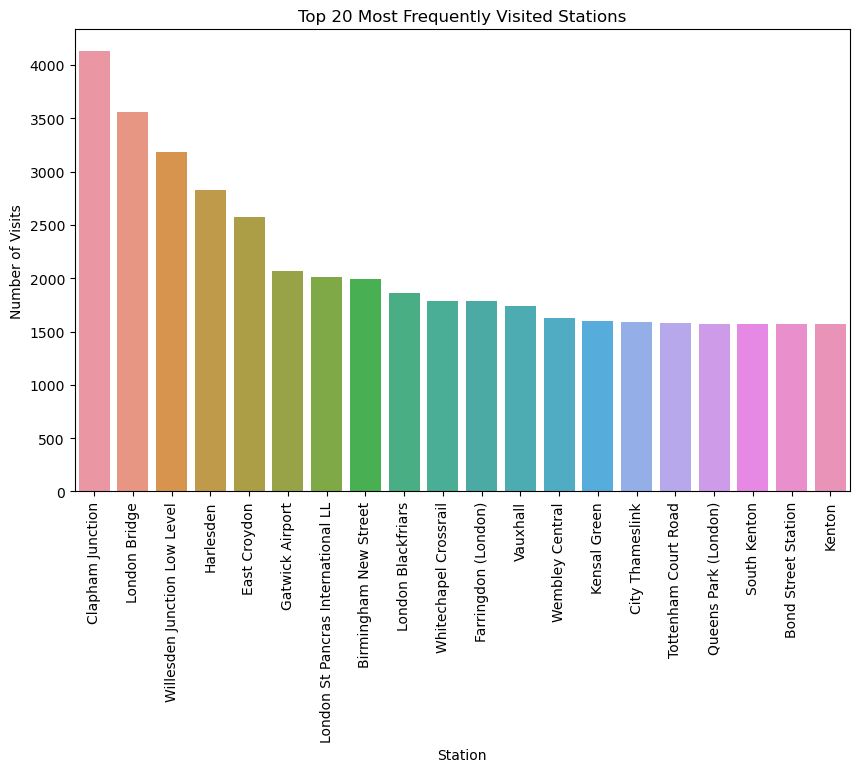

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
# Top 10 most frequently visited stations
top_stations = df_merged['StationName'].value_counts().head(20)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_stations.index, y=top_stations.values)
plt.title('Top 20 Most Frequently Visited Stations')
plt.xlabel('Station')
plt.ylabel('Number of Visits')
plt.xticks(rotation=90)
plt.show()

The chart shows the top 20 most frequently visited stations in the UK rail system, revealing that 13 of these stations are in London. This highlights London's central role in the rail network, driven by its approximate population of 9 million, which constitutes about 13% of the UK's total population. Major hubs like Clapham Junction and London Bridge, as well as key interchange points and commuter stations, contribute to this high traffic, reflecting the substantial demand generated by the city's large population.

Additionally, the chart underscores the importance of regional hubs such as Birmingham New Street, York, and Reading, which serve as central points for their areas, and the significance of rail connections to major airports like Gatwick. The presence of stations like City Thameslink and Whitechapel Crossrail also highlights the integration of various transport modes, providing seamless connectivity for passengers. Overall, London's dominance in the list illustrates its pivotal role in the UK's rail system, driven by its large population and economic activity.

## Distribution of Station Counts 

In [80]:
df_counts = df_merged['StationName'].value_counts().reset_index()
df_counts.columns = ['StationName', 'Counts']

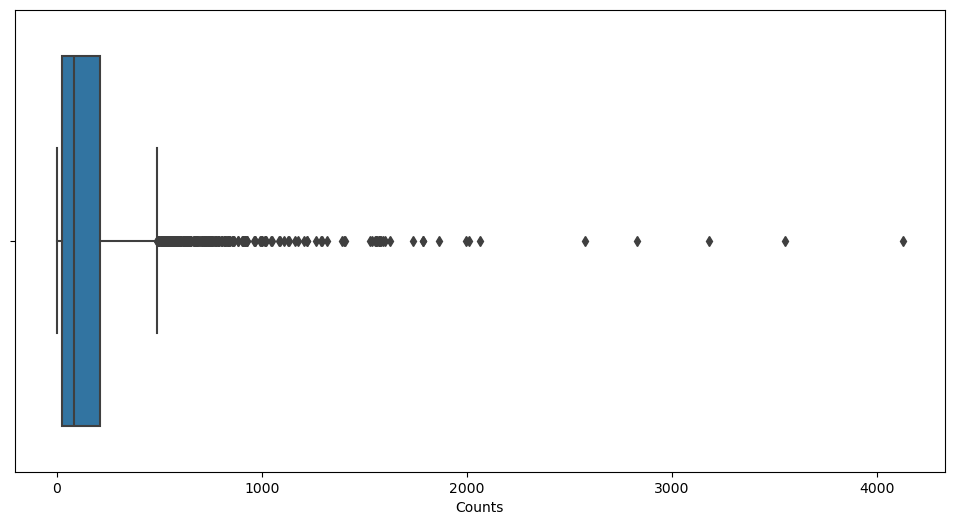

In [81]:
# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_counts['Counts'])


# Show the plot
plt.show()

In [82]:
df_counts.describe()

,Counts
count,3169.000000
mean,173.500473
std,267.952943
min,1.000000
25%,27.000000
50%,85.000000
75%,211.000000
max,4127.000000


## Duration Distribution 

In [83]:
df_merged.describe()

,service_start_date,duration (min),Latitude,Longitude,delayed
count,549823,549823.000000,521306.000000,521306.000000,549823.000000
mean,2024-07-12 01:31:25.180504064,1.506977,52.213162,-1.125910,0.131108
min,2024-07-03 00:00:00,0.050000,50.121672,-5.839077,0.000000
25%,2024-07-10 00:00:00,0.500000,51.433933,-2.176734,0.000000
50%,2024-07-12 00:00:00,1.000000,51.550264,-0.378610,0.000000
75%,2024-07-15 00:00:00,1.000000,52.947073,-0.086984,0.000000
max,2024-07-18 00:00:00,247.000000,58.590175,1.715711,1.000000
std,NaN,3.746679,1.342653,1.431908,0.337518


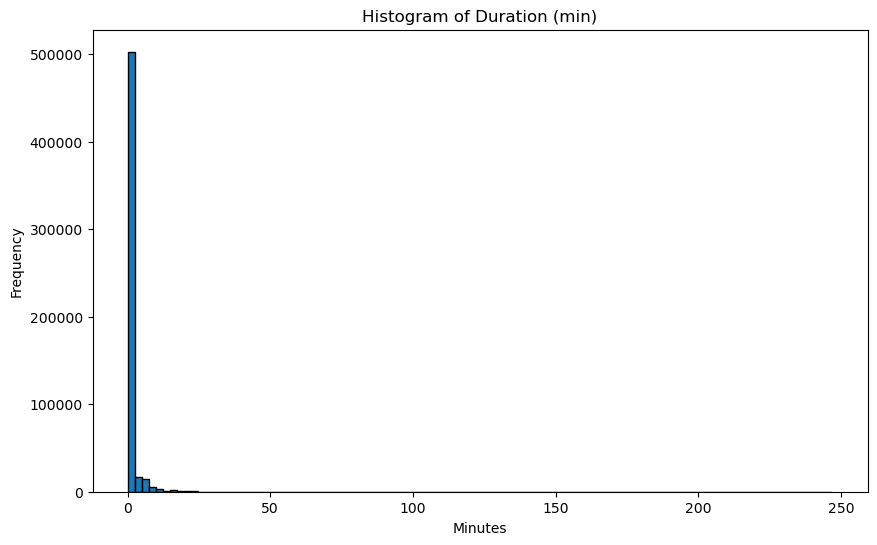

In [84]:
# Histogram for 'duration (min)'
plt.figure(figsize=(10, 6))
plt.hist(df_merged['duration (min)'], bins=100, edgecolor='black')
plt.title('Histogram of Duration (min)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.show()

Showing true 

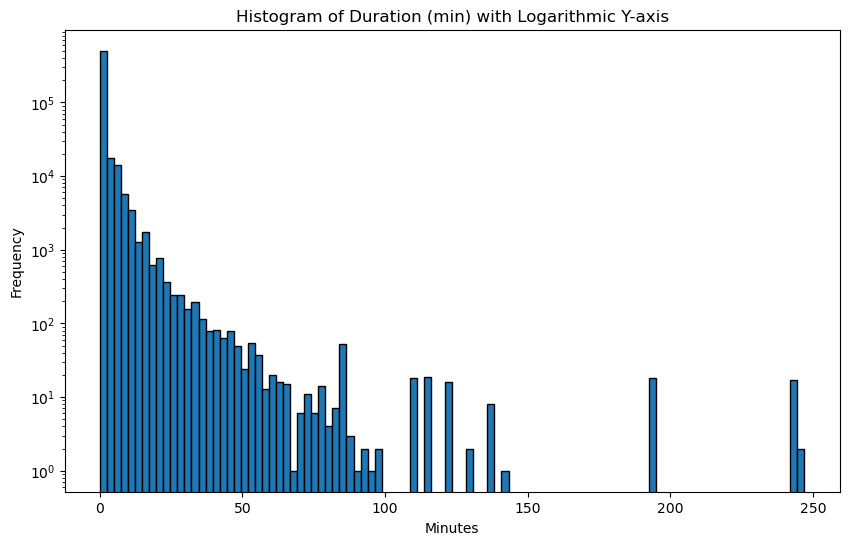

In [85]:
# Histogram for 'duration (min)' with smaller bins and logarithmic x-axis
plt.figure(figsize=(10, 6))
plt.hist(df_merged['duration (min)'], bins=100, edgecolor='black', log=True)

plt.title('Histogram of Duration (min) with Logarithmic Y-axis')
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.yscale('log')
plt.show()

This histogram shows the distribution of trip durations from station to station with a logarithmic y-axis. The logarithmic scale is used to make it easier to see and understand data that has a very wide range by squeezing the numbers into a smaller, more readable format. The histogram reveals a high frequency of short trips, with the majority of trip durations clustered around the lower end, particularly between 0 and 50 minutes. There are significant drops in frequency as the duration increases, indicating that long trips are much less common. A few peaks at higher durations suggest some outliers where trips are unusually long.

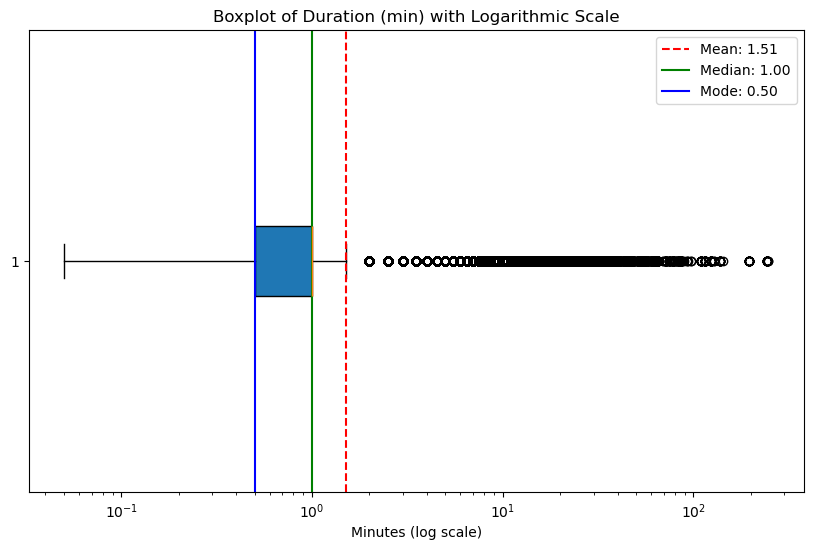

In [86]:
# Boxplot for 'duration (min)' with a logarithmic scale
plt.figure(figsize=(10, 6))
plt.boxplot(df_merged['duration (min)'], vert=False, patch_artist=True, showfliers=True)
plt.xscale('log')

# Add mean and median lines
mean_duration = df_merged['duration (min)'].mean()
median_duration = df_merged['duration (min)'].median()
mode_duration = df_merged['duration (min)'].mode().iloc[0]

plt.axvline(mean_duration, color='r', linestyle='--', label=f'Mean: {mean_duration:.2f}')
plt.axvline(median_duration, color='g', linestyle='-', label=f'Median: {median_duration:.2f}')
plt.axvline(mode_duration, color='b', linestyle='-', label=f'Mode: {mode_duration:.2f}')

plt.title('Boxplot of Duration (min) with Logarithmic Scale')
plt.xlabel('Minutes (log scale)')
plt.legend()
plt.show()

This boxplot provides a detailed summary of the distribution, highlighting the mean, median, and mode durations. The median trip duration is 1 minute, with a mean slightly higher at 1.48 minutes, indicating that the distribution is right-skewed with a long tail of longer durations. The mode is at 0.50 minutes, showing that very short trips are most common. The presence of numerous outliers further supports the observation from the histogram that while most trips are short, there are occasional long trips that are significantly longer than the majority. The logarithmic scale on the x-axis helps to spread out the data points, making it easier to see the distribution and identify the concentration of shorter trips and the spread of longer ones.

### Overall Analysis on Trip Duration Distribution. 

The analysis of trip durations reveals that the majority of trips are very short, with most durations clustered between 0 and 50 minutes. This trend makes sense given that the majority of trips occur in densely populated cities like London, where stations are closely spaced, and the demand for frequent, short commutes is high. In such urban environments, the transportation network is designed to handle large volumes of passengers moving over short distances, facilitating quick and efficient travel between closely situated stations.

In cities like London, people often rely on the rail system for daily commutes, errands, and short-distance travel, contributing to the high frequency of brief trips. The shorter trips are reflective of the urban layout, where stations are strategically placed to maximize accessibility and convenience for city dwellers. The presence of numerous outliers with longer trip durations indicates occasional longer journeys, but these are less common. Overall, the data aligns with the expected travel patterns in a densely populated metropolitan area, emphasizing the importance of the rail network in supporting urban mobility.

## Delay Distributions

C:\Users\audre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\audre\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


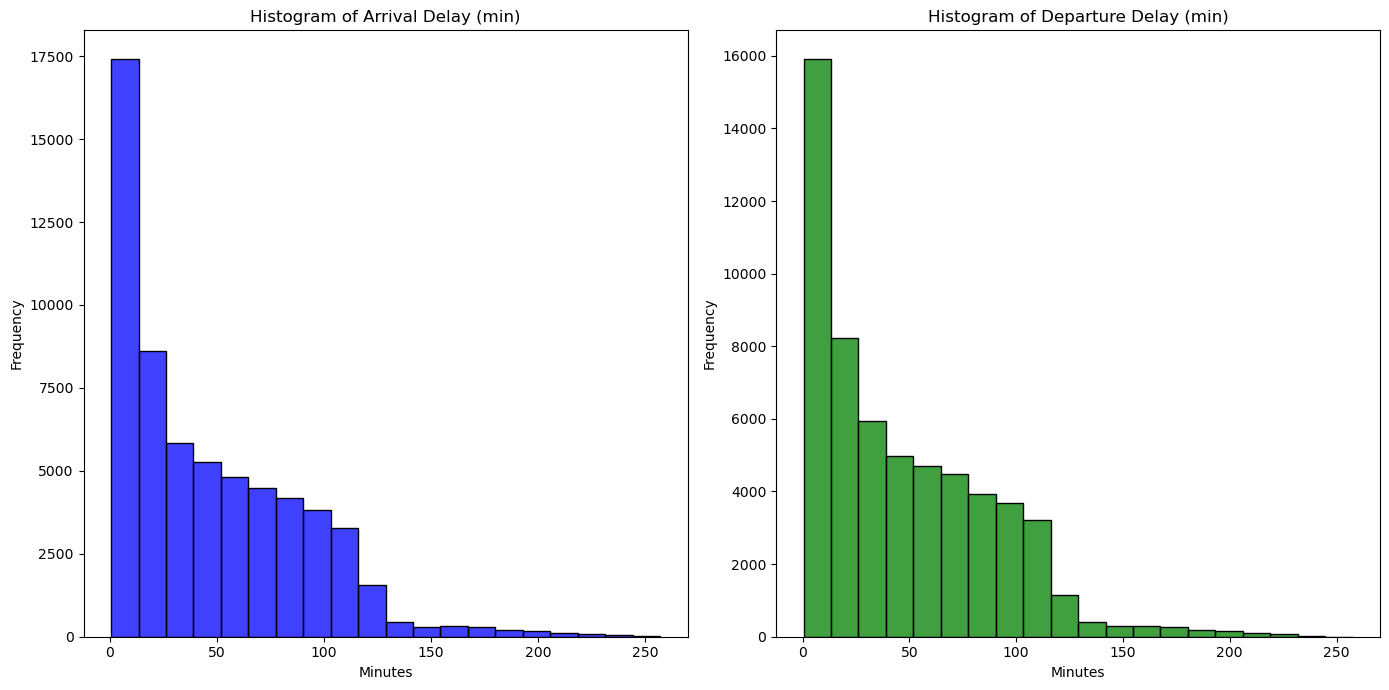

In [87]:
plt.figure(figsize=(14, 7))

# Arrival delay histogram
plt.subplot(1, 2, 1)
sns.histplot(df_delay['arrive_delay(min)'], bins=20, color='blue')
plt.title('Histogram of Arrival Delay (min)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

# Departure delay histogram
plt.subplot(1, 2, 2)
sns.histplot(df_delay['depart_delay(min)'], bins=20, color='green')
plt.title('Histogram of Departure Delay (min)')
plt.xlabel('Minutes')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The histograms display a high frequency of shorter delays, with most clustered between 0 and 50 minutes. As delay time increases, the frequency decreases, indicating that longer delays are less common. This right-skewed distribution shows that while shorter delays are frequent, longer delays, though less common, do occur.

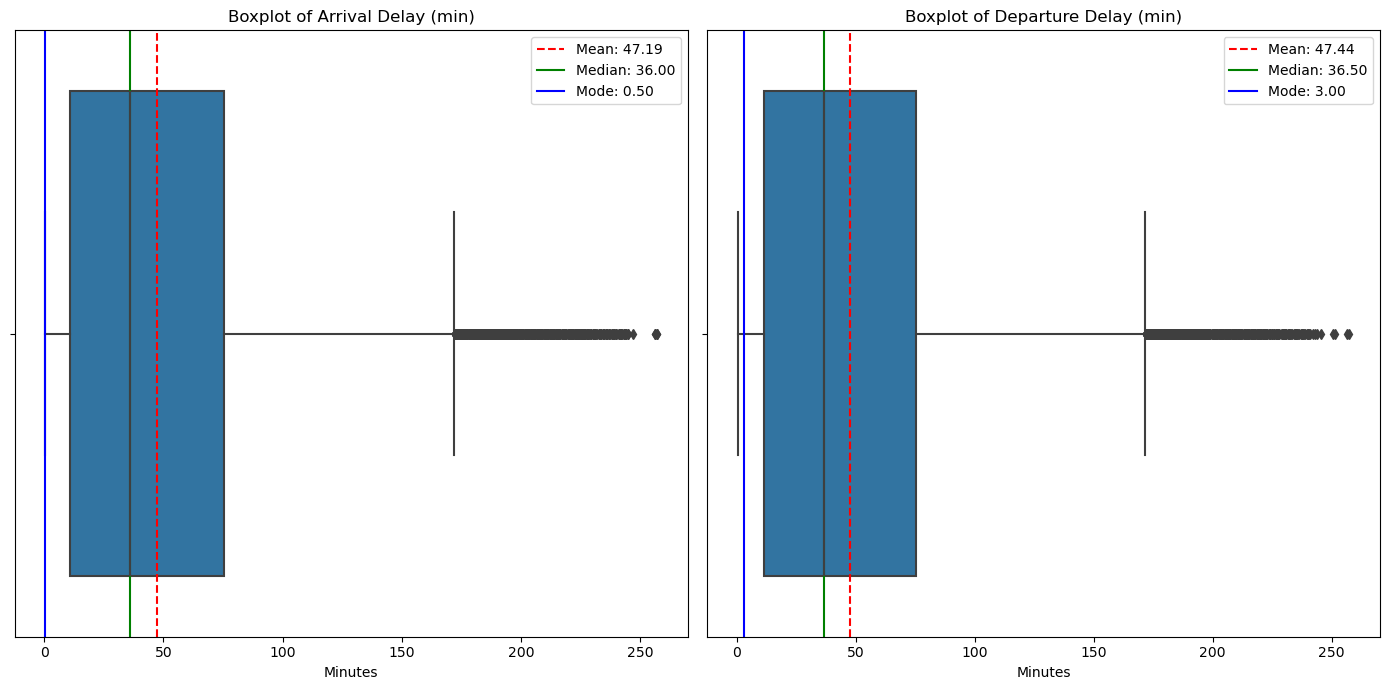

In [88]:
# Plot boxplot for arrival_delay and depart_delay
plt.figure(figsize=(14, 7))

# Adding mode 
arrival_mode = df_delay['arrive_delay(min)'].mode().iloc[0]
depart_mode = df_delay['depart_delay(min)'].mode().iloc[0]

# Arrival delay boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=df_delay['arrive_delay(min)'])
plt.title('Boxplot of Arrival Delay (min)')
plt.xlabel('Minutes')
plt.axvline(df_delay['arrive_delay(min)'].mean(), color='red', linestyle='--', label=f'Mean: {df_delay["arrive_delay(min)"].mean():.2f}')
plt.axvline(df_delay['arrive_delay(min)'].median(), color='green', linestyle='-', label=f'Median: {df_delay["arrive_delay(min)"].median():.2f}')
plt.axvline(arrival_mode, color='b', linestyle='-', label=f'Mode: {arrival_mode:.2f}')
plt.legend()

# Departure delay boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df_delay['depart_delay(min)'])
plt.title('Boxplot of Departure Delay (min)')
plt.xlabel('Minutes')
plt.axvline(df_delay['depart_delay(min)'].mean(), color='red', linestyle='--', label=f'Mean: {df_delay["depart_delay(min)"].mean():.2f}')
plt.axvline(df_delay['depart_delay(min)'].median(), color='green', linestyle='-', label=f'Median: {df_delay["depart_delay(min)"].median():.2f}')
plt.axvline(depart_mode, color='b', linestyle='-', label=f'Mode: {depart_mode:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

Both boxplots show a substantial interquartile range (IQR), indicating a significant spread in the data. The median values for both arrival and departure delays are around 34.5 minutes and 36 minutes, respectively, suggesting that half of the delays are less than these values, while the other half are greater. The mean values for arrival and departure delays are slightly higher than the median values, at 46.9 minutes and 47.41 minutes, respectively. This discrepancy indicates a right-skewed distribution, with a tail extending towards higher delay times. This right-skewed distribution aligns with the histogram analysis, confirming that while most delays are within a reasonable range, there are instances of significantly longer delays.

**Relating back to the duration distribution**

By comparing these observations with the distribution of trip duration, we can conclude that the UK's rail system experiences a higher frequency of shorter trips and moderate delays, with occasional long durations and severe delays that affect the overall average. This understanding can help in addressing the less frequent but impactful longer trips and delays to improve overall system efficiency.

# Export Desired Dataframe

In [89]:
output = df_merged.to_parquet('./cleaned_data/UK_Rail_Data.parquet', index=False)

In [90]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549823 entries, 0 to 549822
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   route_id                549823 non-null  object        
 1   unique_id               549823 non-null  object        
 2   service_start_date      549823 non-null  datetime64[ns]
 3   train_platform          549823 non-null  object        
 4   working_time_arrival    549823 non-null  object        
 5   working_time_departure  549823 non-null  object        
 6   actual_arrival_time     457983 non-null  object        
 7   actual_departure_time   512583 non-null  object        
 8   is_delayed_arrival      549823 non-null  bool          
 9   is_delayed_departure    549823 non-null  bool          
 10  duration (min)          549823 non-null  float64       
 11  weekday                 549823 non-null  object        
 12  TiplocCode              521306

In [91]:
df_merged.describe()

,service_start_date,duration (min),Latitude,Longitude,delayed
count,549823,549823.000000,521306.000000,521306.000000,549823.000000
mean,2024-07-12 01:31:25.180504064,1.506977,52.213162,-1.125910,0.131108
min,2024-07-03 00:00:00,0.050000,50.121672,-5.839077,0.000000
25%,2024-07-10 00:00:00,0.500000,51.433933,-2.176734,0.000000
50%,2024-07-12 00:00:00,1.000000,51.550264,-0.378610,0.000000
75%,2024-07-15 00:00:00,1.000000,52.947073,-0.086984,0.000000
max,2024-07-18 00:00:00,247.000000,58.590175,1.715711,1.000000
std,NaN,3.746679,1.342653,1.431908,0.337518
